<a href="https://colab.research.google.com/github/Germandev55/Topology_and_Geometry-for-Deep-Learning/blob/main/Betti_manifold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

import IPython
from IPython.display import HTML
from google.colab import output

import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, BatchNormalization, Dropout, Convolution2D, Input,Activation, ZeroPadding2D, MaxPooling2D, Flatten
from keras import regularizers

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
scaler = StandardScaler()

!pip install ripser
!pip install persim
!pip install umap-learn
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams
import umap

## утилитарные функции 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train * (1./255.)
x_test = x_test * (1./255.)

170500096/170498071 [==============================] - 6s 0us/step


In [89]:
def features_to_X(x_test, model, index_layer, dim_red = 2):
  input = x_test
  layer = model.get_layer(index=index_layer) 
  layer_name = str(layer).split('.')[5].split(' ')[0]
  features_layer1 = tf.keras.models.Model(inputs=model.inputs, outputs = layer.output)
  output_ = features_layer1(input) 
  try:
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    #global_average_layer = tf.keras.layers.Flatten()
    feature_batch_average = global_average_layer(output_)
    X = feature_batch_average   
  except:
    X = output_   
  return X, layer_name

In [4]:
def get_Betti(data, eps, maxdim=2):
  Betti_layer = []
  dgms = ripser(data, maxdim=maxdim, thresh=eps)['dgms']  
  inf_in_list = lambda x: 1 if np.isinf(x).any() else 0
  Betti_list = [0,0,0]
  for e, i in enumerate(dgms):
    for x in i: Betti_list[e] += inf_in_list(x)
  return sum(Betti_list)

In [5]:
def get_Betti_prob(data, eps, maxdim=2):
  dgms = ripser(data, maxdim=maxdim, thresh=eps)['dgms']  
  prev_max = 0
  list_Hom = []
  mean_Hom = []
  for Hom in dgms:
    B_Hom = 0
    for i in Hom:   
      if np.isinf(i).any() == False:
        B_Hom += (i[1] - i[0])
        prev_max = i[1]
      else:
        continue 
        B_Hom += prev_max
    list_Hom.append(B_Hom)
    l = len(Hom)
    if len(Hom) == 0: l=1
    mean_Hom.append(B_Hom/l)

  mean_Hom =  [round(x,3) for x in mean_Hom] 
  return sum(list_Hom), sum(mean_Hom)

# основные функции

In [49]:
vmodel65 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_small/vgg2_0.65.h5')
vmodel651 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_small/vgg7_0.65.h5')
vmodel66 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_small/vgg6_0.66.h5')
vmodel803 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_small/vgg71_0.803.h5')
vmodel81 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_small/vgg3_0.81.h5')
vmodel835 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_small/vgg81_0.835.h5')
vmodel89 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_big/vgg10_0.902.h5')
vmodel90 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg_big/vgg10_0.90.h5')
#147
models_vgg = [[vmodel65,vmodel651,vmodel66,vmodel803,vmodel81,vmodel835,vmodel89,vmodel90],[0.65,0.65,0.66,0.803,0.81,0.835,0.902,0.90]]

In [56]:
resnet11 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet11_0.72.h5')
resnet20 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet20_0.7572.h5')
resnet29 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet29_0.7808.h5')
resnet101 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet101_0.8089.h5')
resnet128 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet128_0.8125.h5')
resnet38 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet38_0.8179.h5')
resnet200 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet200_0.8201.h5')
resnet155 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet155_0.8208.h5')
resnet56 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet56_0.8463.h5')



In [110]:
models_resnet_ = [[resnet11,resnet20,resnet29,resnet101,resnet128,resnet38,resnet200,resnet155,resnet56],
                 [0.72,0.757,0.78,0.8089,0.8125,0.8179,0.8201,0.8208,0.8211]]

In [106]:
rmodel79 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet2_0.79.h5')
rmodel804 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet4_0.8043.h5')
rmodel81 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet3_0.81.h5')
rmodel84 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet4_0.844.h5')
rmodel85 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet_0.85.h5')
rmodel86 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet4_0.8605.h5')
rmodel862 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet4_0.8617.h5')
rmodel868 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet4_0.8686.h5')
rmodel89 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/seresnet_0.89.h5')
#26-1
models_resnet = [[rmodel79,rmodel804,rmodel81,rmodel84,rmodel85,rmodel86,rmodel862,rmodel868,rmodel89],
                 [0.79,0.80,0.81,0.84,0.85,0.86,0.861,0.868,0.89]]

In [6]:
vgg_256_5 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_0.8584_256_5_0.001_0.2.h5')
vgg_256_3 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_0.8649_256_3_0.001_0.h5')
vgg_512_5 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_0.7996_512_5_0.001_0.0_batch32.h5')
vgg_type_models = [[vgg_512_5,vgg_256_5,vgg_256_3],
                 [0.799,0.8584,0.864]]

In [95]:
#модели без train 100
vgg69 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_0.6937.h5')
vgg67 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_train_0.9994_test_0.6769_.h5')
vgg77 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_train_0.9353_test_0.771_.h5')
vgg80 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_train_0.9073_test_0.8022_.h5')
vgg81 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_train_0.922_test_0.8108_.h5')
vgg83 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_train_0.885_test_0.8293_.h5')
vgg85 = keras.models.load_model('/content/drive/MyDrive/ML_materials/vgg-block/vgg_train_0.976_test_0.8555_.h5')



In [96]:
VGG = [[vgg67,vgg69,vgg77,vgg80,vgg81,vgg83,vgg85],
      [0.6769,0.6937,0.771,0.810,0.8293,0.855]]


In [71]:
resnet56_75 = keras.models.load_model('/content/drive/MyDrive/ML_materials/resnet/resnet56_0.7513.h5')

Resnets = [[resnet56_75],
      [0.75]]

In [113]:
def Betti_generaliz(models,eps_lft,eps_sum,examples):
  models = models[0]
  Global_Betti_prob = []
  Global_Betti_mean = []
  Global_Betti_sum = []
  
  Betti_layer_listglobal = []
  Betti_layer_mean_listglobal = []
  sum_betti_listglobal = []
  
  for model in models:
    X_emb, layer_name = features_to_X(x_train[:examples], model, -2) 
    print(X_emb.shape[1])
    
    #Xtest = scaler.fit_transform(X_emb)
    #Xtest = min_max_scaler.fit_transform(X_emb)#масштабирует признаки до заданного диапазона [0:1].
    Xtest = max_abs_scaler.fit_transform(X_emb) #Масштабирует каждый признак по его максимальному абсолютному значению
    
    #embedding = LocallyLinearEmbedding(n_neighbors=250, n_components=8)
    #X_emb  = embedding.fit_transform(X_emb)
    
    #UMAP_reducer = umap.UMAP(n_components=5, min_dist=0.7, n_neighbors=50, metric='euclidean') # 0.7/50/euclidean
    #Xtest = UMAP_reducer.fit_transform(Xtest)
    
    #Xtest = X_emb 

    Betti_layer_class = []
    Betti_layer_mean_class = []
    Global_Betti_sum_class = []
    for c in list(range(10)):
      X_emb_class = []
      for e, i in enumerate(y_train[:examples]):
        if i == c: X_emb_class.append(Xtest[e])
      Xtest_class = np.array(X_emb_class)

      #print('max = ',squareform(pdist(Xtest_class)).max())
      #continue

      Betti_layer, Betti_layer_mean = get_Betti_prob(Xtest_class, eps_lft, 2)
      Betti_s = 1#get_Betti(Xtest_class, eps_sum, 2)

      Global_Betti_sum_class.append(Betti_s)
      Betti_layer_class.append(Betti_layer)
      Betti_layer_mean_class.append(Betti_layer_mean)

    Global_Betti_sum.append(sum(Global_Betti_sum_class)/10)
    Betti_layer_listglobal.append(sum(Betti_layer_class)/10)
    Betti_layer_mean_listglobal.append(sum(Betti_layer_mean_class)/10)  

  Betti_layer_listglobal = [round(x,4) for x in Betti_layer_listglobal]
  Betti_layer_mean_listglobal = [round(x,5) for x in Betti_layer_mean_listglobal]
  
  return Betti_layer_listglobal, Betti_layer_mean_listglobal,Global_Betti_sum

In [115]:
examples = 2000
eps_lft = np.inf
eps_sum = 0.03
Betti_local, Betti_global,Betti_sum = Betti_generaliz(models_resnet_, eps_lft, eps_sum, examples)
print(Betti_local,Betti_global,Betti_sum)

10
10
10
10
10
10
10
10
10
[68.0983, 54.3411, 50.4497, 49.4462, 50.6116, 56.3106, 48.1755, 48.3479, 67.3476] [0.353, 0.2842, 0.2637, 0.2594, 0.265, 0.2938, 0.2523, 0.2531, 0.3489] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
'''
VGG
-9/min_max_scaler/2000[945.0222, 672.8654, 120.3462, 125.816, 104.891] 
-8/min_max_scaler/2000[369.023, 355.0821, 166.9999, 121.0827, 125.9114, 105.1816] 
-4/min_max_scaler/2000[348.0895, 277.7723, 235.9055, 142.4937, 144.0737, 157.7996]



[0.72,0.757,0.78,0.8089,0.8125,0.8179,0.8201,0.8208,0.8211]]
models_resnet_
max_abs_scaler/-2/2500[213.3144, 175.0379, 160.9611, 157.6073, 157.7873, 181.2175, 150.0677, 152.1473, 182.6788] 
max_abs_scaler/2500[80.3013, 65.4808, 60.3195, 59.0235, 59.2865, 68.242, 56.588, 57.2235, 68.8168]


min_max_scaler/2500[43.129, 37.5545, 35.3874, 33.6794, 34.4873, 39.1439, 32.9584, 33.6994, 37.1215] 


LLE nei=100,dim=10[6.3894, 4.4852, 3.7749, 2.7159, 3.4844, 4.8548, 2.5623, 3.0616, 3.8985] 
LLE nei=10,dim=10[4.8003, 2.3272, 1.4688, 0.2537, 0.8969, 3.0527, 0.3245, 0.2888, 1.1849] 



'''

In [35]:
%%capture
!pip install celluloid
from celluloid import Camera

In [ ]:
vgg13.layers

In [51]:
(trainX, y_train), (testX, y_test) = tf.keras.datasets.cifar10.load_data()
#y_train = tf.keras.utils.to_categorical(trainY)
#y_test = tf.keras.utils.to_categorical(testY)
'''
x_train = x_train / 255.0
x_test = x_test / 255.0
'''
x_train = trainX.astype('float32')
x_test = testX.astype('float32')
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

0
1
2


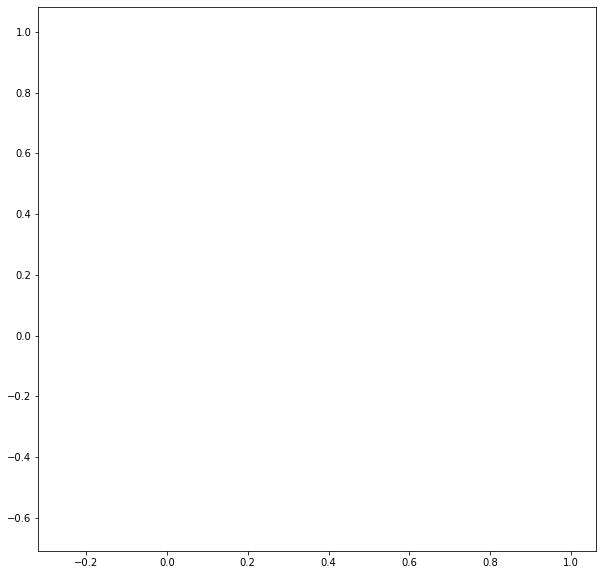

In [63]:
#Xtest = min_max_scaler.fit_transform(X_emb)#масштабирует признаки до заданного диапазона [0:1].
#Xtest = preprocessing.normalize(X_emb, norm='l2')
#Xtest = max_abs_scaler.fit_transform(X_emb) #Масштабирует каждый признак по его максимальному абсолютному значению
models = vgg_type_models
fig, ax = plt.subplots(figsize=(10, 10))
camera = Camera(fig)
examples = 1000
UMAP_reducer = umap.UMAP(n_components=2, min_dist=0.7, n_neighbors=300, metric='euclidean') # 0.7/50/euclidean

#embedding = LocallyLinearEmbedding(n_neighbors=1000, n_components=2)
for e,model in enumerate(models[0]): 
  X_emb, layer_name = features_to_X(x_train[:examples], model, -2)
  
  #X_emb = max_abs_scaler.fit_transform(X_emb)
  #X_emb  = embedding.fit_transform(X_emb)
  X_emb = UMAP_reducer.fit_transform(X_emb)
  X_emb = max_abs_scaler.fit_transform(X_emb)
  plt.scatter(X_emb[:, 0], X_emb[:, 1], c= y_train[:examples], alpha=0.9)
  print(e)
  text = str(f'{models[1][e]}')
  plt.text(0, 0, text, bbox=dict(facecolor='red', alpha=0.8))
  camera.snap()
  
anim = camera.animate(interval = 2200, repeat = True, repeat_delay = 500)
HTML(anim.to_html5_video())